# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
import seaborn as sns

In [2]:
# Your code here
data = pd.read_csv('/Users/gabriellevieira/Documents/GitHub/lab-problems-in-ml/data/boston_data.csv')

In [4]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [3]:
data.info()
# we don't have missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     404 non-null    float64
 1   zn       404 non-null    float64
 2   indus    404 non-null    float64
 3   chas     404 non-null    float64
 4   nox      404 non-null    float64
 5   rm       404 non-null    float64
 6   age      404 non-null    float64
 7   dis      404 non-null    float64
 8   rad      404 non-null    float64
 9   tax      404 non-null    float64
 10  ptratio  404 non-null    float64
 11  black    404 non-null    float64
 12  lstat    404 non-null    float64
 13  medv     404 non-null    float64
dtypes: float64(14)
memory usage: 44.3 KB


<AxesSubplot:>

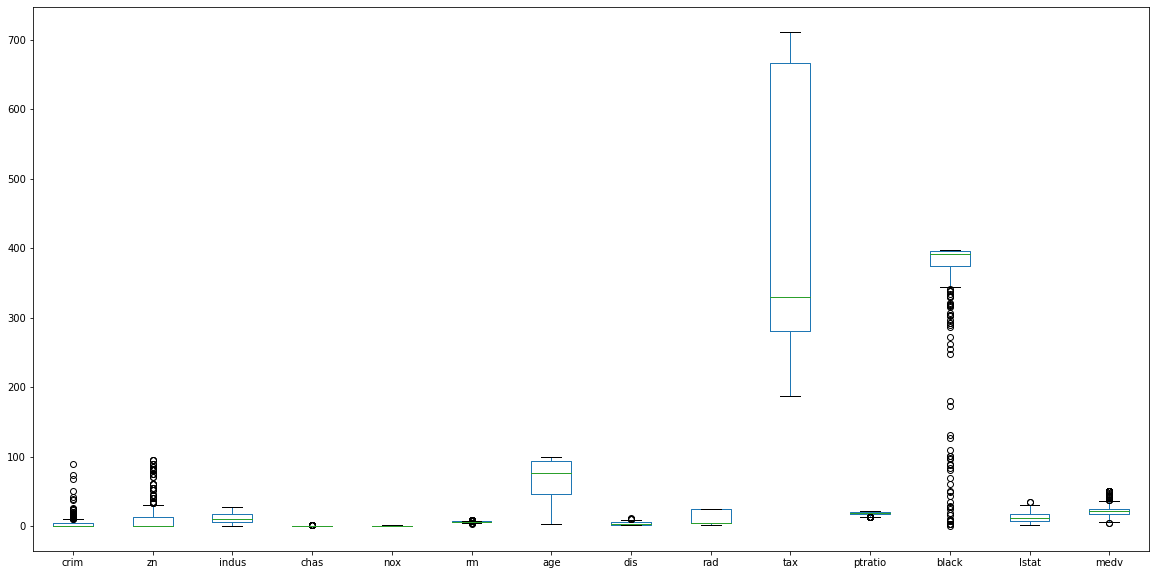

In [7]:
data.plot.box(figsize = (20,10))

In [13]:
#removing outliers
z_scores = scipy.stats.zscore(data)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_data = data[filtered_entries]

In [15]:
new_data.reset_index(inplace=True)

### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

<AxesSubplot:>

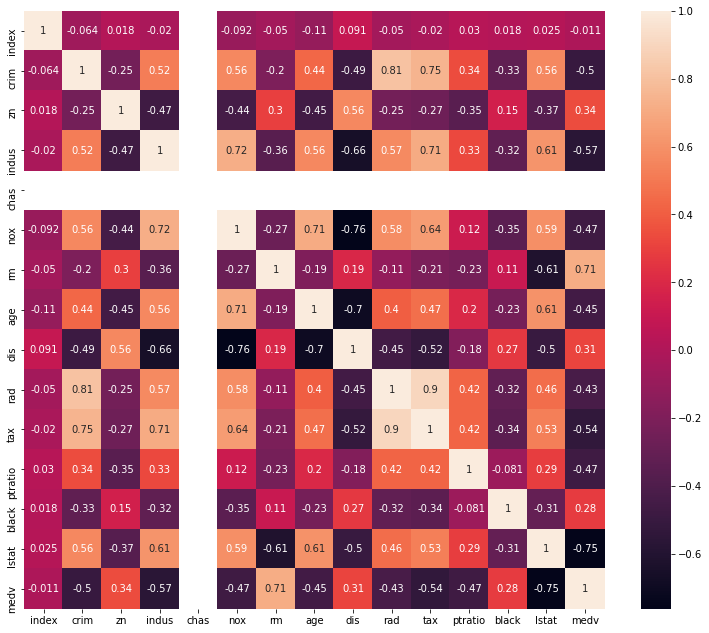

In [21]:
fig, ax = plt.subplots(figsize = (13,11))
sns.heatmap(new_data.corr(),annot=True)

In [22]:
new_data.drop('tax',axis=1,inplace=True)

/opt/miniconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [24]:
new_data.drop('rad',axis=1,inplace=True)

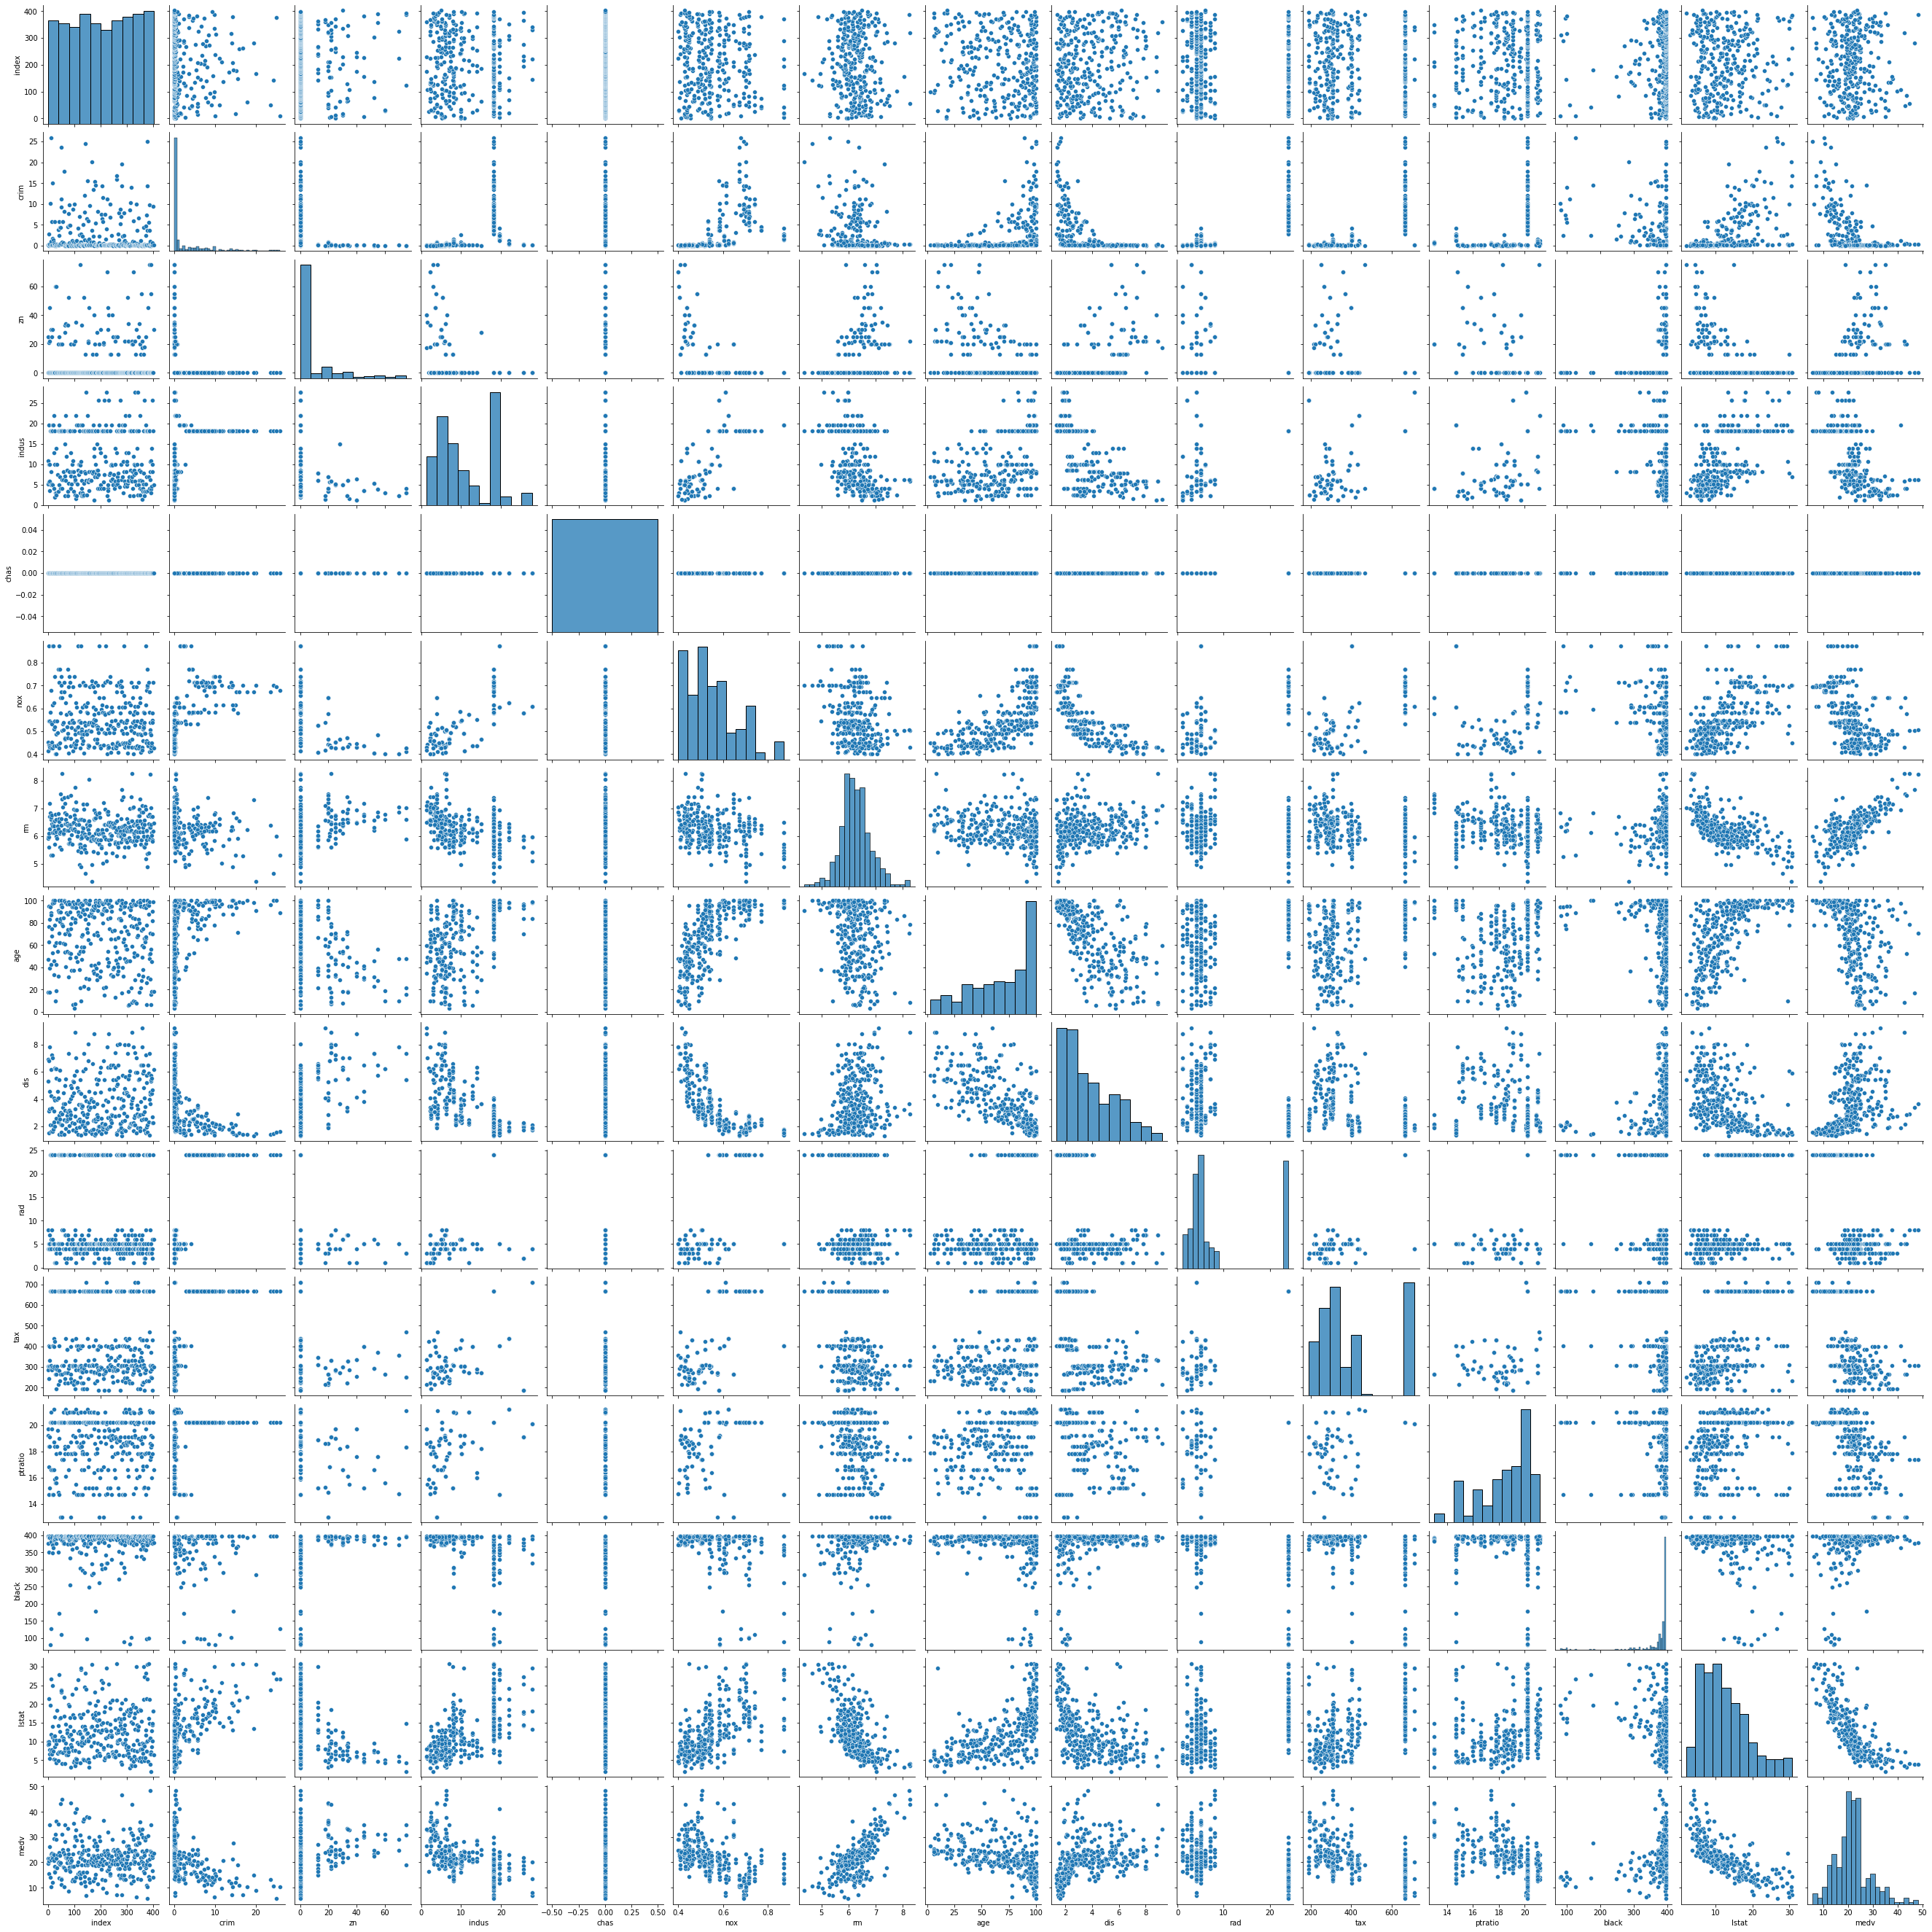

In [18]:
# Your plots here
sns.pairplot(new_data)

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [ ]:
# Your response here
#It is possible to see some relationships in some variables.

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

<AxesSubplot:>

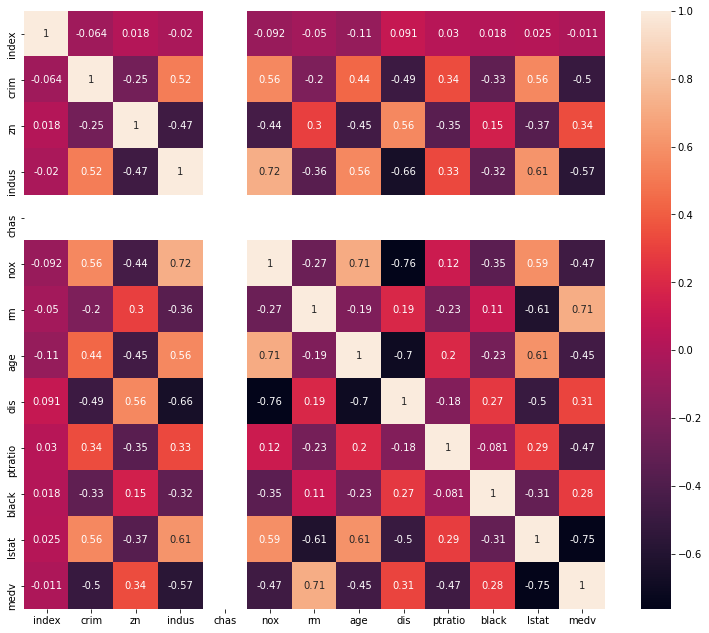

In [26]:
# Your response here
fig, ax = plt.subplots(figsize = (13,11))
sns.heatmap(new_data.corr(),annot=True)

In [27]:
#I wouldn't drop any more variable, since the correlation is below 80%

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [28]:
# Your code here
new_data.describe()

,index,crim,zn,indus,chas,nox,rm,age,dis,ptratio,black,lstat,medv
count,321.000000,321.000000,321.000000,321.000000,321.0,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000
mean,204.271028,2.527761,7.370717,11.034611,0.0,0.550987,6.258252,68.159813,3.800378,18.547664,373.198941,12.558193,21.783489
std,118.254670,4.736615,15.396264,6.681523,0.0,0.110912,0.566576,27.889502,1.898933,2.041645,55.710630,6.483750,7.122202
min,0.000000,0.006320,0.000000,1.250000,0.0,0.400000,4.368000,2.900000,1.316300,13.000000,81.330000,1.980000,5.600000
25%,103.000000,0.083080,0.000000,5.320000,0.0,0.453000,5.891000,46.700000,2.200400,17.400000,378.250000,7.510000,17.800000
50%,206.000000,0.214090,0.000000,8.560000,0.0,0.532000,6.223000,74.400000,3.360300,19.100000,392.530000,11.320000,21.200000
75%,308.000000,2.449530,0.000000,18.100000,0.0,0.614000,6.556000,94.300000,5.287300,20.200000,396.900000,16.350000,24.600000
max,403.000000,25.940600,75.000000,27.740000,0.0,0.871000,8.266000,100.000000,9.222900,21.200000,396.900000,30.810000,48.300000


----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [29]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    return r2_score(y_true, y_predict)

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [31]:
# Your code here
from sklearn.model_selection import train_test_split
y=new_data['medv']
X=new_data.drop('medv',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [36]:
# Five separate RFR here with the given max depths
from sklearn.ensemble import RandomForestRegressor
param = [2,4,6,8,10]
result = []
for i in param:
    regr = RandomForestRegressor(max_depth=i, random_state=0)
    regr.fit(X, y)
    y_test_pred = regr.predict(X_test)
    print('Max_depth: ',i)
    print('score: ', performance_metric(y_test, y_test_pred))
    result.append(performance_metric(y_test, y_test_pred))

Max_depth:  2
score:  0.7541775721402635
Max_depth:  4
score:  0.8764122824256448
Max_depth:  6
score:  0.9422026087073538
Max_depth:  8
score:  0.9638311914638631
Max_depth:  10
score:  0.9702632871420668


Now, plot the score for each tree on the training set and on the testing set.

<AxesSubplot:>

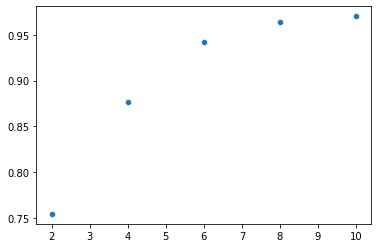

In [38]:
# Produce a plot with the score for the testing and training for the different max depths
sns.scatterplot(x=param,y=result)

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [ ]:
# Your response here
#Considering only this example, if we increase the max_depth, we have a better result. However this might overfit the model at some point.

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? Check out this article before answering: https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229

In [ ]:
# Your response here
# I believe the maximum depth of 1 has a high bias, since it is underfitting
# maximum depth of 10 has a high variance.

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [40]:
# Your response here
from sklearn.ensemble import RandomForestRegressor
result = []
for i in range(1,100):
    regr = RandomForestRegressor(max_depth=i, random_state=0)
    regr.fit(X, y)
    y_test_pred = regr.predict(X_test)
    print('Max_depth: ',i)
    print('score: ', performance_metric(y_test, y_test_pred))
    result.append(performance_metric(y_test, y_test_pred))


Max_depth:  1
score:  0.5168687063943337
Max_depth:  2
score:  0.7541775721402635
Max_depth:  3
score:  0.8193769262491697
Max_depth:  4
score:  0.8764122824256448
Max_depth:  5
score:  0.917319557088884
Max_depth:  6
score:  0.9422026087073538
Max_depth:  7
score:  0.9568374701394503
Max_depth:  8
score:  0.9638311914638631
Max_depth:  9
score:  0.968120125640788
Max_depth:  10
score:  0.9702632871420668
Max_depth:  11
score:  0.9720032183094371
Max_depth:  12
score:  0.9734422248482788
Max_depth:  13
score:  0.9735843548578651
Max_depth:  14
score:  0.9738313031901084
Max_depth:  15
score:  0.9731791251811909
Max_depth:  16
score:  0.9732324049524288
Max_depth:  17
score:  0.9732796243101397
Max_depth:  18
score:  0.9733853833593226
Max_depth:  19
score:  0.97306204099056
Max_depth:  20
score:  0.9729739932835059
Max_depth:  21
score:  0.9729360202245692
Max_depth:  22
score:  0.9729804813190954
Max_depth:  23
score:  0.9729804813190954
Max_depth:  24
score:  0.9729804813190954
Max_d

In [ ]:
#Max_depth of 15 has the better accuracy.

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [ ]:
# Your response here
#How relevant today is data that was collected from 1978?
# We may use this data combined from other years to understand the scenario
#Are the features present in the data sufficient to describe a home?
# We found a high accuracy, so I believe it is sufficient
#Is the model robust enough to make consistent predictions?
# we need to combine with the data from other years, since it is from 1978
#Would data collected in an urban city like Boston be applicable in a rural city?
# I wouldn't believe, since we are changing the scenario, however it might be a good start.